In [82]:
import random 
import numpy as np
import scipy.io as spy
from __future__ import division
import time

data_path="/Users/Luba/Desktop/hw6/dataset/"

data=spy.loadmat(data_path+"train.mat")
test_data=spy.loadmat(data_path+"test.mat")

In [4]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [5]:
training_images=data.get('train_images')

In [6]:
training_images[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
training_data_vec=[]
for k in range(len((training_images[0][0]))):
    element=[]
    for i in range(28):
        for j in range(28):
            element.append(training_images[i][j][k])
    training_data_vec.append(element)

In [8]:
training_labels_vec=data.get('train_labels')

In [12]:
d_vec=[list(np.true_divide(np.array(k), 255)) for k in training_data_vec]

In [84]:
test_images=test_data.get('test_images')

In [106]:
test_data_vec=[]
for k in test_images:
    k=k.tolist()
    element=[]
    for i in range(28):
        element=element+k[i::28]
    test_data_vec.append(element)

In [107]:
len(test_data_vec)

10000

In [118]:
t_vec = [list(np.true_divide(np.array(k), 255)) for k in test_data_vec]

In [119]:
len(d_vec)

60000

In [14]:
training_data=np.array(d_vec)

In [16]:
training_labels=np.array(training_labels_vec)

In [19]:
training_data.shape

(60000, 784)

In [120]:
test_data_array=np.array(t_vec)

In [121]:
len(t_vec)

10000

In [303]:
from __future__ import division
import numpy as np
import random 

class NeuralNetwork(object):

    def __init__(self, n_in=784, n_hid=200, n_out=10):

        self.biases = [(0.01*np.random.randn(y, 1)) for y in [n_hid, n_out]]
        self.weights = [(0.01*np.random.randn(y, x)) for x, y in zip([n_in, n_hid], [n_hid, n_out])]
                         
        self.total_training_error=[]
        self.training_accuracy_iter=[]
        self.training_accuracy_epoch=[]
        self.valid_accuracy=[]
             
    def stoch_train(self, training_data, test_data, learning_rate, epoch_num, small_batch_size, cost_func="Cross_Entropy"):
        batch_num=0
        opech_num=0
        train_data_len = len(training_data)
        
        count=0
        while(count<epoch_num):
            random.shuffle(training_data)
            small_batch_set = [training_data[i:i+small_batch_size] for i in range(0, train_data_len, small_batch_size)]
            for small_batch in small_batch_set:
                batch_num +=1 
                       
                weights_update = [np.zeros(weight.shape) for weight in self.weights]
                bias_update = [np.zeros(bias.shape) for bias in self.biases]
                for a, b in small_batch:
                       delta_bias, delta_weight = self.back_propagation(a, b, cost_func)
                       bias_update = [bias_upd+dbias for dbias, bias_upd in zip(delta_bias, bias_update)]
                       weights_update = [weight_upd+dweight for dweight, weight_upd in zip(delta_weight, weights_update)]
                self.weights = [weight-((learning_rate/len(small_batch))*w_delta) for w_delta, weight in zip(weights_update, self.weights)]  
                self.biases = [bias-((learning_rate/len(small_batch))*b_delta) for b_delta, bias in zip(bias_update, self.biases)]
                
                if(batch_num%100==0):
                    total_error=0
                    for (x_p,y_p) in training_data:
                        x1_p = tanh(np.dot(self.weights[0], x_p)+self.biases[0])
                        x2_p = Sigmoid(np.dot(self.weights[1], x1_p)+self.biases[1]) 
                    total_error += self.point_error(x2_p, y_p, cost_func)
                    self.total_training_error.append(total_error)
                    
                    training_set_acc_results_iter = [(self.predict(x), np.argmax(y)) for (x, y) in training_data]
                    train_acc_sum_iter=0
                    for (a,b) in training_set_acc_results_iter:
                        if(a==b):
                            train_acc_sum_iter+=1
                    t_acc_results_iter = train_acc_sum_iter/len(training_data)
                    self.training_accuracy_iter.append(t_acc_results_iter)
                    
            
            opech_num +=1
            if(opech_num>=70 and cost_func=="Cross_Entropy"):
                       learning_rate = 0.005

            valid_set_results = [(self.predict(x), y) for (x, y) in test_data]
            val_sum=0
            for (z,y) in valid_set_results:
                if(z==y):
                    val_sum+=1  
            valid_set_performance = val_sum/len(test_data)
            print("Opech#: " + str(opech_num) + " Validation Set Accuracy: " + str(valid_set_performance))
            self.valid_accuracy.append(valid_set_performance)
            
            training_set_acc_results = [(self.predict(x), np.argmax(y)) for (x, y) in training_data]
            train_acc_sum=0
            for (z,y) in training_set_acc_results:
                if(z==y):
                    train_acc_sum+=1
            t_acc_results = train_acc_sum/len(training_data)
            self.training_accuracy_epoch.append(t_acc_results)
            
            count+=1
                       

    #backpropagation algorithm. helper function for the stoch_train function.
    def back_propagation(self, a, b, cost_func):

        delta_weights = [np.zeros(weight.shape) for weight in self.weights]
        delta_bias = [np.zeros(bias.shape) for bias in self.biases]         
        node = a
        nodes_activated = [a] 
        nodes_vec = [] 
        vec = (np.dot(self.weights[0], node)+1*self.biases[0])
        nodes_vec.append(vec)
        node = tanh(vec)
        nodes_activated.append(node)
        vec = (np.dot(self.weights[1], node)+1*self.biases[1])
        nodes_vec.append(vec)
        node = Sigmoid(vec)
        nodes_activated.append(node)
    
        if(cost_func=="MSE"):
            dta = MSE_der(nodes_activated[-1], b)*Prime_sigmoid(nodes_vec[-1])
        elif(cost_func=="Cross_Entropy"):
            dta = CEntropy_der(nodes_activated[-1], b)*Prime_sigmoid(nodes_vec[-1])
        else:
            dta = CEntropy_der(nodes_activated[-1], b)*Prime_sigmoid(nodes_vec[-1])
        delta_bias[-1] = dta
        delta_weights[-1] = np.dot(dta, nodes_activated[-2].transpose())
        vec = nodes_vec[-2]
        tanh_actd = Prime_tanh(vec)
        dta = np.dot(self.weights[-1].transpose(), dta) * tanh_actd
        delta_bias[-2] = dta
        delta_weights[-2] = np.dot(dta, nodes_activated[-3].transpose())
        
        return (delta_bias, delta_weights)

                       
    def predict(self, x):
        x1 = tanh(np.dot(self.weights[0], x)+self.biases[0])
        x2 = Sigmoid(np.dot(self.weights[1], x1)+self.biases[1])               
        digit_class = np.argmax(x2)
        return digit_class
    
    def point_error(self, z, y, cost_func):
        if(cost_func=="Cross_Entropy"):
            return CEntropy(z,y)
        elif(cost_func=="MSE"):
            return MSE(z,y)
        else:
            return CEntropy(z,y)
        
# error/cost functions and other helper functions
                       
def MSE(z,y):
    return (0.5)*np.square(np.linalg.norm(z-y))

def CEntropy(z,y):
    return np.sum(np.nan_to_num(-y*np.log(z)-(1-y)*np.log(1-z)))
                
def MSE_der(z,y):
    return z-y

def CEntropy_der(z,y):
    return -((y/z)-(1-y)/(1-z))

def tanh(x):
    return (np.exp(2*x)-1)/(np.exp(2*x)+1)

def Prime_tanh(x):
    return 1-tanh(x)**2

def Sigmoid(a):
    x=np.exp(-a)
    return 1.0/(1.0+x)

def Prime_sigmoid(x):
    return Sigmoid(x)*(1-Sigmoid(x))

In [206]:
def train_output_format(x):
    vec = np.zeros((10, 1))
    vec[x] = 1.0
    return vec

In [24]:
y_arr=[train_output_format(y[0]) for y in training_labels]

In [25]:
len(training_labels)

60000

In [28]:
t_arr = [np.reshape(x, (784, 1)) for x in training_data]

In [95]:
len(training_data)

60000

In [122]:
test_arr=[np.reshape(x, (784, 1)) for x in test_data_array]

In [124]:
len(test_arr)

10000

In [125]:
len(t_arr)

60000

In [32]:
#randomf shuffling and dividing data set into training and validation
import random
index=range(60000)
index=list(index)
random.shuffle(index)


test_size=10000

test_index=random.sample(index,test_size)
train_index=list(set(index)-set(test_index))
random.shuffle(train_index)


In [36]:
len(train_index)

50000

In [37]:
len(test_index)

10000

In [38]:
y_arr_t=[training_labels[k][0] for k in test_index]

In [39]:
t_arr_t=[t_arr[i] for i in test_index]

In [40]:
test_zip = zip(t_arr_t, y_arr_t)

In [41]:
train_d= [t_arr[i] for i in train_index]

In [42]:
train_lab = [y_arr[i] for i in train_index]

In [43]:
zip_d=zip(train_d, train_lab)

In [178]:
#For Kaggle
NN_CEntropy = NeuralNetwork(n_in=784, n_hid=200, n_out=10)
NN_CEntropy.stoch_train(zip_d, test_data=test_zip, learning_rate=0.01, epoch_num=20, small_batch_size=10, cost_func="Cross_Entropy")        

Opech#: 1 Test accuracy: 0.878
Opech#: 2 Test accuracy: 0.9047
Opech#: 3 Test accuracy: 0.9197
Opech#: 4 Test accuracy: 0.9308
Opech#: 5 Test accuracy: 0.9379
Opech#: 6 Test accuracy: 0.9427
Opech#: 7 Test accuracy: 0.9489
Opech#: 8 Test accuracy: 0.9524
Opech#: 9 Test accuracy: 0.9549
Opech#: 10 Test accuracy: 0.9572
Opech#: 11 Test accuracy: 0.9597
Opech#: 12 Test accuracy: 0.9628
Opech#: 13 Test accuracy: 0.9648
Opech#: 14 Test accuracy: 0.964
Opech#: 15 Test accuracy: 0.9652
Opech#: 16 Test accuracy: 0.9644
Opech#: 17 Test accuracy: 0.9664
Opech#: 18 Test accuracy: 0.9659
Opech#: 19 Test accuracy: 0.9683
Opech#: 20 Test accuracy: 0.9676
Opech#: 21 Test accuracy: 0.9685
Opech#: 22 Test accuracy: 0.9687
Opech#: 23 Test accuracy: 0.9695
Opech#: 24 Test accuracy: 0.9696
Opech#: 25 Test accuracy: 0.9696
Opech#: 26 Test accuracy: 0.9696
Opech#: 27 Test accuracy: 0.9694
Opech#: 28 Test accuracy: 0.9696
Opech#: 29 Test accuracy: 0.9704
Opech#: 30 Test accuracy: 0.9696
Opech#: 31 Test accur

In [179]:
CE_test_result=[]
for k in range(len(test_arr)):
    CE_test_result.append(NN_CEntropy.predict(test_arr[k]))

In [180]:
len(CE_test_result)

10000

In [182]:
import csv
writer=csv.writer(open("CE_test_result.csv", 'wb'))
for elem in CE_test_result:
    l=[elem]
    writer.writerow(l) 

In [373]:
############### Cross-Entropy error model training starts here ###################

In [304]:
start_time_2_CEntropy= time.time()
NN_2_CEntropy = NeuralNetwork(n_in=784, n_hid=200, n_out=10)
NN_2_CEntropy.stoch_train(zip_d, test_data=test_zip, learning_rate=0.01, epoch_num=20, small_batch_size=10, cost_func="Cross_Entropy")
elapsed_time_2_CEntropy= time.time() - start_time_2_CEntropy

Opech#: 1 Validation Set Accuracy: 0.865
Opech#: 2 Validation Set Accuracy: 0.8865
Opech#: 3 Validation Set Accuracy: 0.905
Opech#: 4 Validation Set Accuracy: 0.9169
Opech#: 5 Validation Set Accuracy: 0.927
Opech#: 6 Validation Set Accuracy: 0.9366
Opech#: 7 Validation Set Accuracy: 0.9415
Opech#: 8 Validation Set Accuracy: 0.9463
Opech#: 9 Validation Set Accuracy: 0.948
Opech#: 10 Validation Set Accuracy: 0.9525
Opech#: 11 Validation Set Accuracy: 0.9562
Opech#: 12 Validation Set Accuracy: 0.9574
Opech#: 13 Validation Set Accuracy: 0.959
Opech#: 14 Validation Set Accuracy: 0.9604
Opech#: 15 Validation Set Accuracy: 0.9618
Opech#: 16 Validation Set Accuracy: 0.9641
Opech#: 17 Validation Set Accuracy: 0.9633
Opech#: 18 Validation Set Accuracy: 0.9647
Opech#: 19 Validation Set Accuracy: 0.9658
Opech#: 20 Validation Set Accuracy: 0.9664


In [305]:
print(len(NN_2_CEntropy.total_training_error))
print(len(NN_2_CEntropy.training_accuracy_iter))
print(len(NN_2_CEntropy.training_accuracy_epoch))
print(len(NN_2_CEntropy.valid_accuracy))

1000
1000
20
20


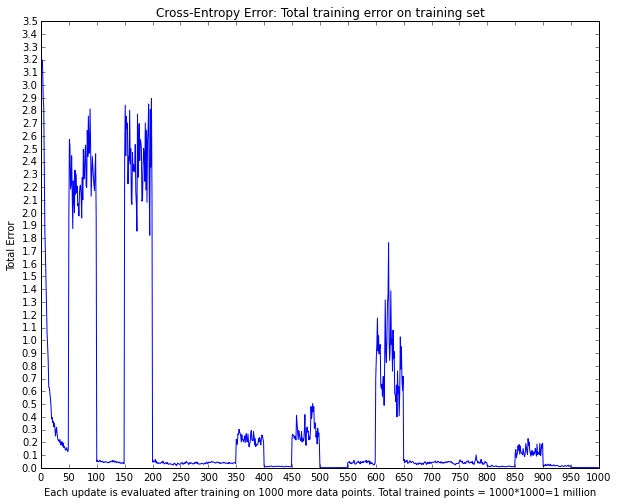

In [401]:
plt.figure(figsize=(10,8))
x_val=range(0,1001)
#y_range=range(0,101)
plt.plot(NN_2_CEntropy.total_training_error)
plt.xticks(np.arange(min(x_val), max(x_val)+1, 50.0))
plt.yticks(np.arange(0, 3.5+0.1, 0.1))
plt.title('Cross-Entropy Error: Total training error on training set')
plt.xlabel('Each update is evaluated after training on 1000 more data points. Total trained points = 1000*1000=1 million')
plt.ylabel('Total Error')
#plt.show()

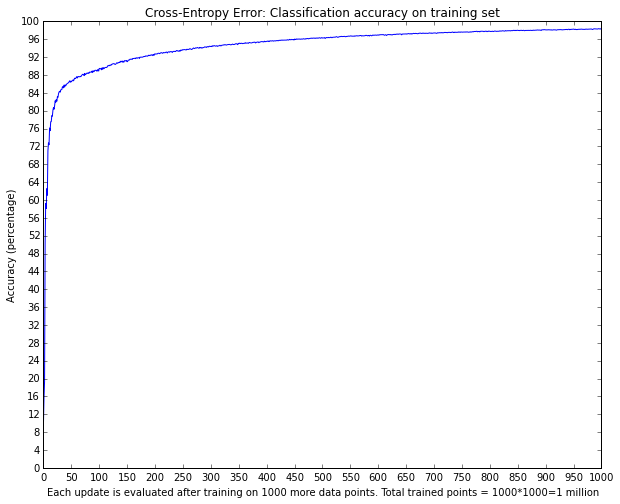

In [402]:
perc_NN_2_CEntropy=[100*x for x in NN_2_CEntropy.training_accuracy_iter]
plt.figure(figsize=(10,8))
x_val=range(0,1001)
y_range=range(0,101)
plt.plot(perc_NN_2_CEntropy)
plt.xticks(np.arange(min(x_val), max(x_val)+1, 50.0))
plt.yticks(np.arange(min(y_range), max(y_range)+1, 4.0))
plt.title('Cross-Entropy Error: Classification accuracy on training set')
plt.xlabel('Each update is evaluated after training on 1000 more data points. Total trained points = 1000*1000=1 million')
plt.ylabel('Accuracy (percentage)')
plt.show()

In [341]:
elapsed_time_2_CEntropy/60 #min

133.3484337011973

In [346]:
NN_2_CEntropy.training_accuracy_epoch

[0.86622,
 0.8887,
 0.91234,
 0.92672,
 0.93636,
 0.94382,
 0.94958,
 0.95482,
 0.95828,
 0.96366,
 0.96716,
 0.96966,
 0.97184,
 0.97396,
 0.9761,
 0.97816,
 0.9802,
 0.9811,
 0.98246,
 0.98286]

In [395]:
perc_NN_2_CEntropy_train=[x*100 for x in NN_2_CEntropy.training_accuracy_epoch]

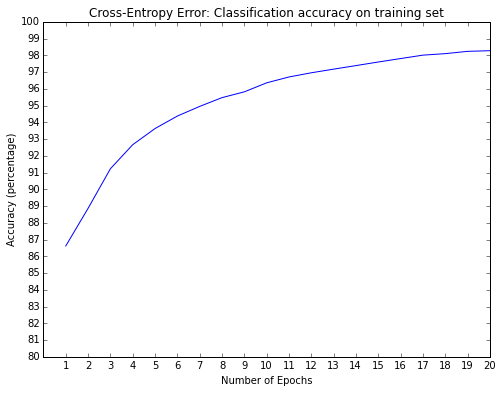

In [358]:
plt.figure(figsize=(8,6))
x_values=range(1,21)
x_val=range(1,21)
y_range=range(80,101)
plt.plot(y_values, perc_NN_2_CEntropy_train)
plt.xticks(np.arange(min(x_val), max(x_val)+1, 1))
plt.yticks(np.arange(min(y_range), max(y_range)+1, 1))
plt.title('Cross-Entropy Error: Training accuracy on training set')
plt.xlabel('Number of Epochs')
plt.ylabel('Training Accuracy (percentage)')
plt.show()

In [361]:
NN_2_CEntropy.valid_accuracy
perc_NN_2_CEntropy_valid=[x*100 for x in NN_2_CEntropy.valid_accuracy]

In [362]:
perc_NN_2_CEntropy_valid

[86.5,
 88.64999999999999,
 90.5,
 91.69,
 92.7,
 93.66,
 94.15,
 94.63000000000001,
 94.8,
 95.25,
 95.62,
 95.74000000000001,
 95.89999999999999,
 96.04,
 96.17999999999999,
 96.41,
 96.33,
 96.47,
 96.58,
 96.64]

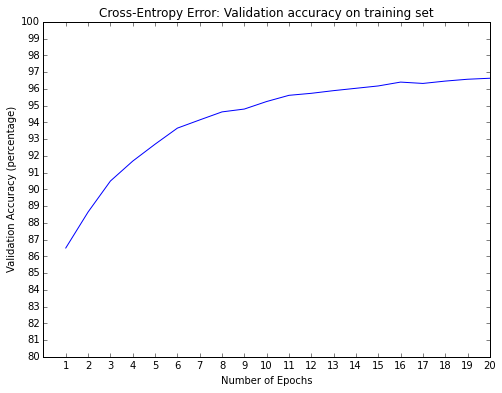

In [363]:
plt.figure(figsize=(8,6))
x_values=range(1,21)
x_val=range(1,21)
y_range=range(80,101)
plt.plot(y_values, perc_NN_2_CEntropy_valid)
plt.xticks(np.arange(min(x_val), max(x_val)+1, 1))
plt.yticks(np.arange(min(y_range), max(y_range)+1, 1))
plt.title('Cross-Entropy Error: Validation accuracy on training set')
plt.xlabel('Number of Epochs')
plt.ylabel('Validation Accuracy (percentage)')
plt.show()

In [396]:
# training accuracy and validation accuracy after 20 epochs
print(perc_NN_2_CEntropy_train[19],perc_NN_2_CEntropy_valid[19])

(98.286, 96.64)


In [399]:
# Total elapsed minutes for Cross-Entropy error model
#(it is slow because it is saving and printing a lot of things along the way)
print(elapsed_time_2_CEntropy/60) #min

133.348433701


In [374]:
############### Mean squared error model training starts here ###################

In [306]:
start_time_1_MSE= time.time()
NN_1_MSE = NeuralNetwork(n_in=784, n_hid=200, n_out=10)
NN_1_MSE.stoch_train(zip_d, test_data=test_zip, learning_rate=0.01, epoch_num=20, small_batch_size=10, cost_func="MSE")
elapsed_time_1_MSE= time.time() - start_time_1_MSE

Opech#: 1 Validation Set Accuracy: 0.464
Opech#: 2 Validation Set Accuracy: 0.7426
Opech#: 3 Validation Set Accuracy: 0.8198
Opech#: 4 Validation Set Accuracy: 0.8416
Opech#: 5 Validation Set Accuracy: 0.8542
Opech#: 6 Validation Set Accuracy: 0.8625
Opech#: 7 Validation Set Accuracy: 0.8693
Opech#: 8 Validation Set Accuracy: 0.874
Opech#: 9 Validation Set Accuracy: 0.8771
Opech#: 10 Validation Set Accuracy: 0.8825
Opech#: 11 Validation Set Accuracy: 0.8845
Opech#: 12 Validation Set Accuracy: 0.8886
Opech#: 13 Validation Set Accuracy: 0.893
Opech#: 14 Validation Set Accuracy: 0.8941
Opech#: 15 Validation Set Accuracy: 0.8986
Opech#: 16 Validation Set Accuracy: 0.9009
Opech#: 17 Validation Set Accuracy: 0.9024
Opech#: 18 Validation Set Accuracy: 0.9047
Opech#: 19 Validation Set Accuracy: 0.9075
Opech#: 20 Validation Set Accuracy: 0.9096


In [308]:
print(len(NN_1_MSE.total_training_error))
print(len(NN_1_MSE.training_accuracy_iter))
print(len(NN_1_MSE.training_accuracy_epoch))
print(len(NN_1_MSE.valid_accuracy))

1000
1000
20
20


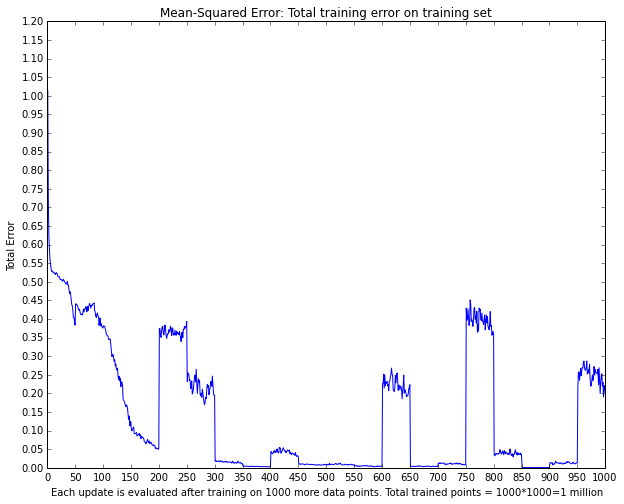

In [403]:
plt.figure(figsize=(10,8))

x_values=range(1,1001)
#y_range=range(0,101)
plt.plot(x_values, NN_1_MSE.total_training_error)
plt.xticks(np.arange(min(x_values)-1, max(x_val)+1, 50.0))
plt.yticks(np.arange(0, 1.2+0.05, 0.05))
plt.title('Mean-Squared Error: Total training error on training set')
plt.xlabel('Each update is evaluated after training on 1000 more data points. Total trained points = 1000*1000=1 million')
plt.ylabel('Total Error')
#plt.show()

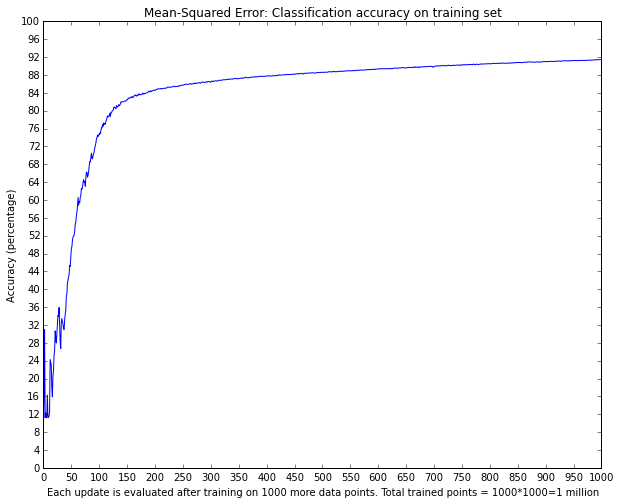

In [404]:
perc_NN_1_MSE=[100*x for x in NN_1_MSE.training_accuracy_iter]
plt.figure(figsize=(10,8))
x_val=range(1,1001)
y_range=range(0,101)
plt.plot(perc_NN_1_MSE)
plt.xticks(np.arange(min(x_val)-1, max(x_val)+1, 50.0))
plt.yticks(np.arange(min(y_range), max(y_range)+1, 4.0))
plt.title('Mean-Squared Error: Classification accuracy on training set')
plt.xlabel('Each update is evaluated after training on 1000 more data points. Total trained points = 1000*1000=1 million')
plt.ylabel('Accuracy (percentage)')
plt.show()

In [378]:
print(len(NN_1_MSE.training_accuracy_epoch))

20


In [379]:
perc_NN_1_MSE_train=[x*100 for x in NN_1_MSE.training_accuracy_epoch]

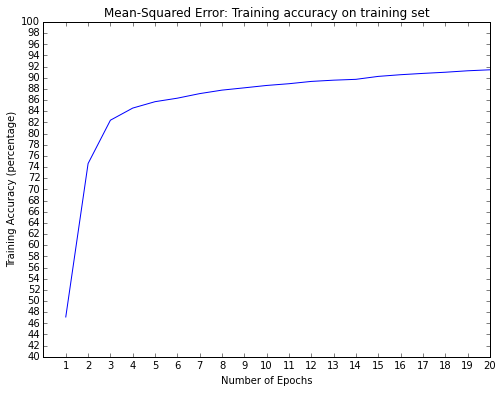

In [385]:
plt.figure(figsize=(8,6))
x_val=range(1,21)
y_range=range(40,101)
plt.plot(y_values, perc_NN_1_MSE_train)
plt.xticks(np.arange(min(x_val), max(x_val)+1, 1))
plt.yticks(np.arange(min(y_range), max(y_range)+1, 2))
plt.title('Mean-Squared Error: Training accuracy on training set')
plt.xlabel('Number of Epochs')
plt.ylabel('Training Accuracy (percentage)')
plt.show()

In [387]:
print(len(NN_1_MSE.valid_accuracy))

20


In [388]:
perc_NN_1_MSE_valid=[x*100 for x in NN_1_MSE.valid_accuracy]

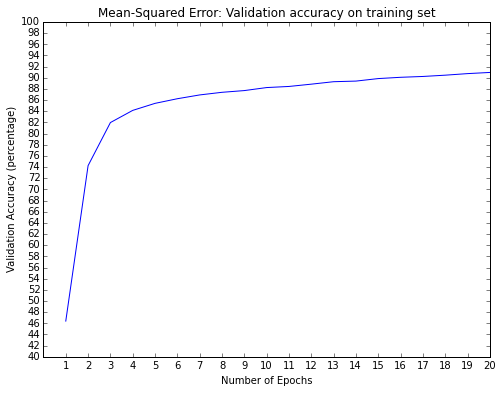

In [391]:
plt.figure(figsize=(8,6))
x_values=range(1,21)
x_val=range(1,21)
y_range=range(40,101)
plt.plot(y_values, perc_NN_1_MSE_valid)
plt.xticks(np.arange(min(x_val), max(x_val)+1, 1))
plt.yticks(np.arange(min(y_range), max(y_range)+1, 2))
plt.title('Mean-Squared Error: Validation accuracy on training set')
plt.xlabel('Number of Epochs')
plt.ylabel('Validation Accuracy (percentage)')
plt.show()

In [397]:
# training accuracy and validation accuracy after 20 epochs
print(perc_NN_1_MSE_train[19],perc_NN_1_MSE_valid[19])

(91.434, 90.96)


In [400]:
# Total elapsed minutes for MSE model
#(it is slow because it is saving and printing a lot of things along the way)
print(elapsed_time_1_MSE/60)  #min

142.415567382
